In [1]:
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data from http://archive.ics.uci.edu/ml/datasets/Bank+Marketing
# https://towardsdatascience.com/data-handling-using-pandas-machine-learning-in-real-life-be76a697418c
bank = pd.read_csv('bank.csv',sep=';')
print('Training examples x Features = (%g,%g)'%bank.shape)
# columns 
columns = bank.columns
print("\ncolumns \n",columns.tolist())
# print first n lines  
head = bank.head(n=5)
print("\nfirst %g lines\n"%len(head),head)
# data types of colummns in bank 
print(bank.info())

Training examples x Features = (4521,17)

columns 
 ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

first 5 lines
    age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun  

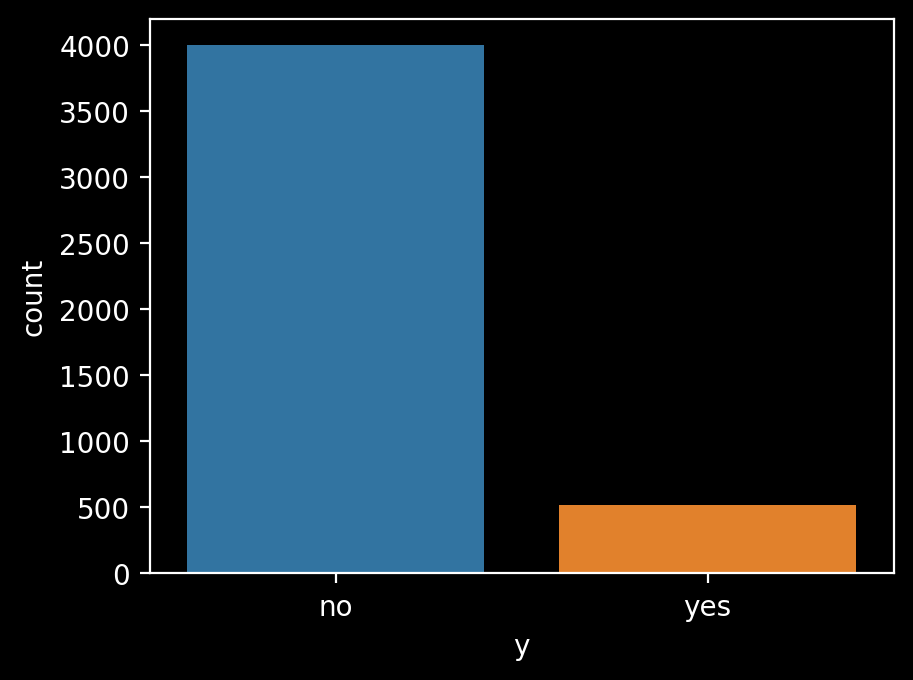

In [3]:
"""
fig = px.histogram(bank, 
                   x="y",
                   color="y",
                   template="plotly_dark",
                   width=550,
                   height=450)
fig.update_layout(showlegend=False)
fig.show()
"""
countplt = sns.countplot(x='y', data=bank)
plt.show()


In [4]:
# convert bool into binary array: (False -> 0, True -> 1)
bank['y'] = (bank['y'] == 'yes').astype(int)  # changing yes to 1 and no to 0
print('counts of no (0) and yes (1)')
print(bank['y'].value_counts())
print('\nthe mean of each column that is either no (0) or yes (1)')
print(bank.groupby('y').mean())
print("")
print('\nthe mean of each column by education')
print(bank.groupby('education').mean(),"\n")
print("education values = ", bank['education'].unique())
print("marital values = ", bank['marital'].unique())

counts of no (0) and yes (1)
0    4000
1     521
Name: y, dtype: int64

the mean of each column that is either no (0) or yes (1)
         age      balance        day    duration  campaign      pdays  \
y                                                                       
0  40.998000  1403.211750  15.948750  226.347500  2.862250  36.006000   
1  42.491363  1571.955854  15.658349  552.742802  2.266795  68.639155   

   previous  
y            
0  0.471250  
1  1.090211  


the mean of each column by education
                 age      balance        day    duration  campaign      pdays  \
education                                                                       
primary    46.833333  1411.544248  15.505900  261.709440  2.865782  35.069322   
secondary  40.062446  1196.814397  15.977884  269.863833  2.734172  40.934085   
tertiary   39.645926  1775.423704  16.009630  256.881481  2.901481  39.824444   
unknown    45.299465  1701.245989  15.946524  250.449198  2.486631  41.983957 

In [5]:
"""
    Create list of columns with data type = object. 
    Add new columns to data frame corresponding to each of the options within that category.
    If that training example is associated with a particular category add 1 otherwise fill with 0.
    This is necessary to give a numerical value to string type features in order to train the data.
    Join the new categories and update the old data frame.
"""
categories = ['job','marital','education','default','housing','loan','contact','month','poutcome']
for key in categories:
    add = pd.get_dummies(bank[key],prefix=key)
    bank = bank.join(add)
print(bank.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


In [6]:
# need to remove old column headers of the categorical variables
columns = bank.columns.tolist()
keep = [col for col in bank if col not in categories]
bank = bank[keep]

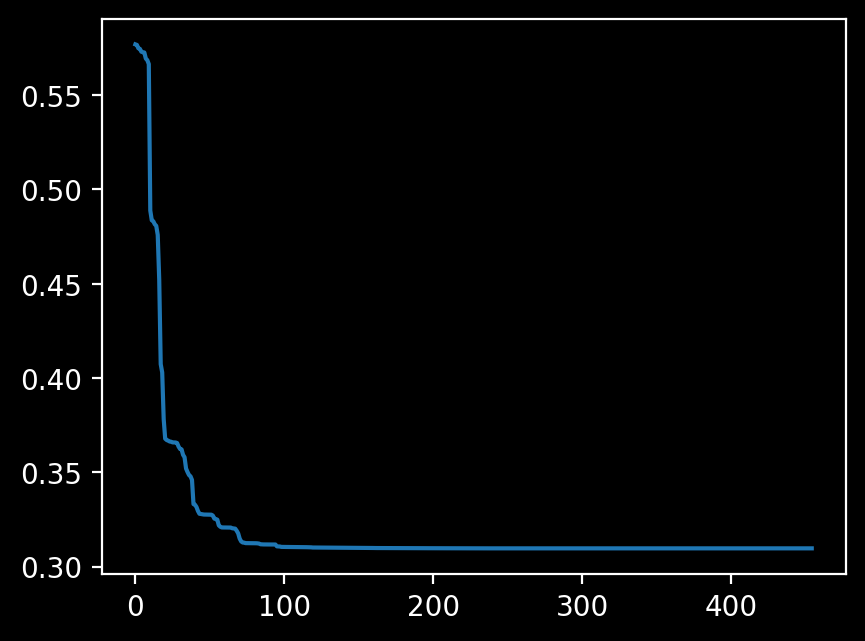

89.1616898916169


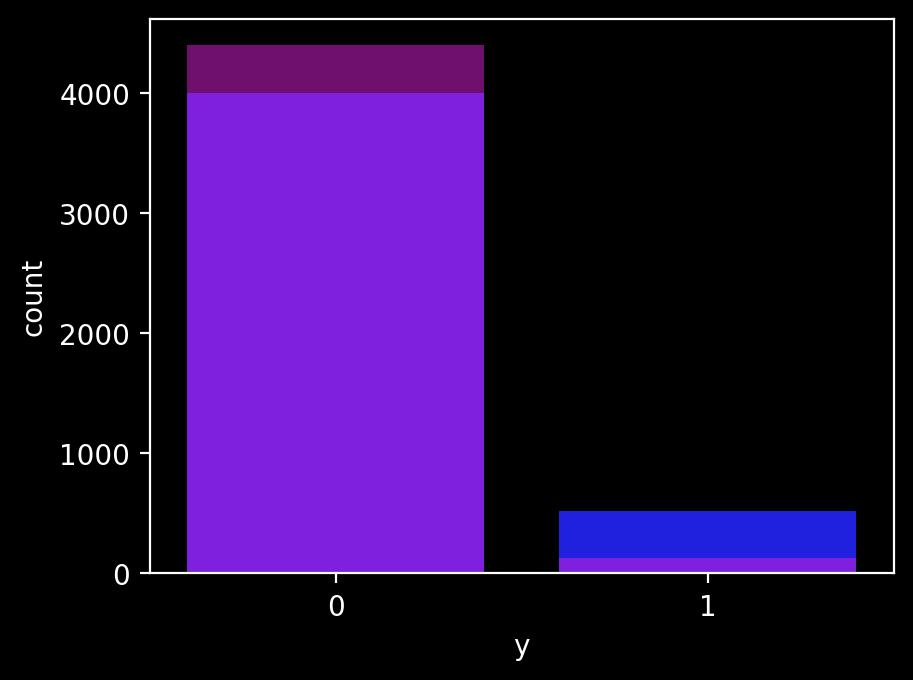

In [7]:
from MachineLearning.SupervisedLearning import LogisticRegression

y = bank['y'].values
select = ['job_retired', 'marital_married', 'default_no', 'loan_yes', 'contact_unknown', 'month_dec', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_success', 'poutcome_unknown']
X = bank[(col for col in select if col != 'y')].values

LR = LogisticRegression(X,y,lam=1,normalize=True)
theta,J = LR(method="CG")
plt.plot(J)
plt.show()
_,p = LR.predict(X,theta[-1])
p = p.astype(int)
accuracy = np.mean((p==y).astype(float))*100
print(accuracy)

bank_predict = bank.copy(deep=True)
bank_predict['y'] = p
fig,ax = plt.subplots()
sns.countplot(x='y',data=bank,ax=ax,color="blue")
sns.countplot(x='y',data=bank_predict,ax=ax,color="magenta",alpha=0.5)
plt.show()

15 selected features
0.8913957089139571


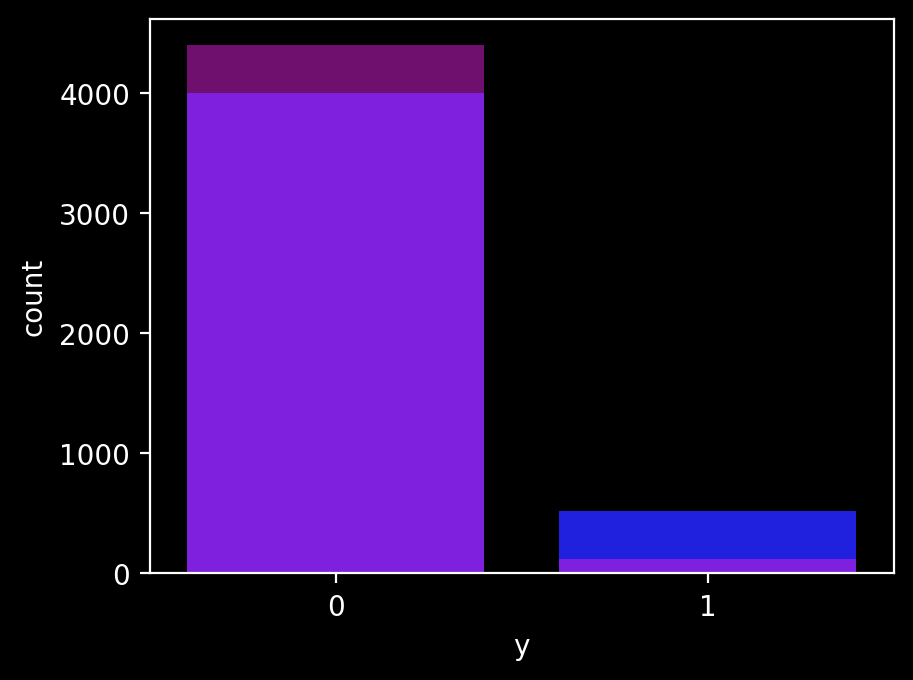

In [8]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
num_feats = None
X = bank[(col for col in keep if col != 'y')]
y = bank['y']
rfe_selector = RFE(estimator=LogisticRegression(solver="newton-cg"),n_features_to_select=15)
rfe_selector.fit(X, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Xnew = X.loc[:,rfe_support]
model = LogisticRegression(solver="newton-cg")
model.fit(Xnew,y)
print(model.score(Xnew,y))
p = model.predict(Xnew)
bank_precict = bank.copy(deep=True)
bank_predict['y'] = p
fig,ax = plt.subplots()
sns.countplot(x='y',data=bank,ax=ax,color="blue")
sns.countplot(x='y',data=bank_predict,ax=ax,color="magenta",alpha=0.5)
plt.show()

Back propagation error using 20 random parameters is 3.73e-10
Accuracy of training paramters is 89 %


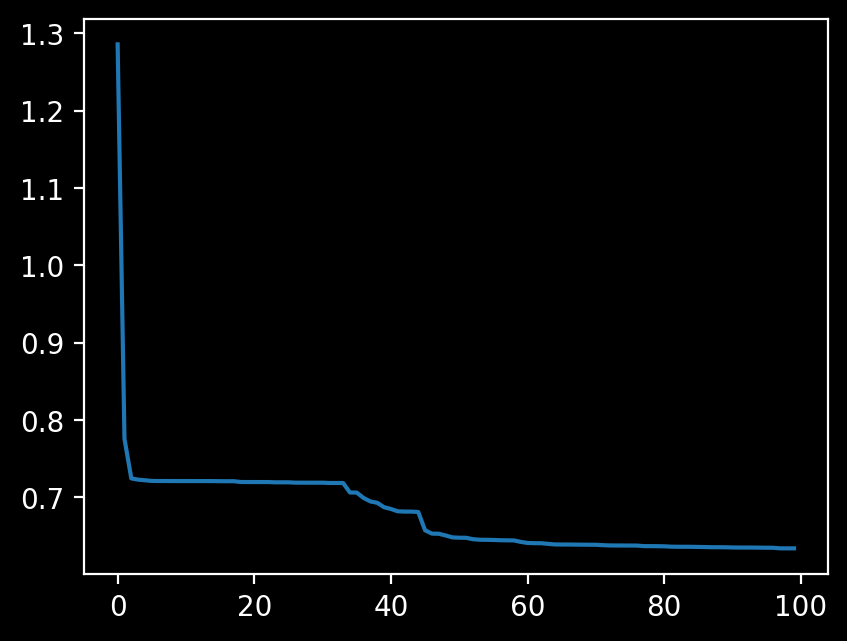

[0 1]


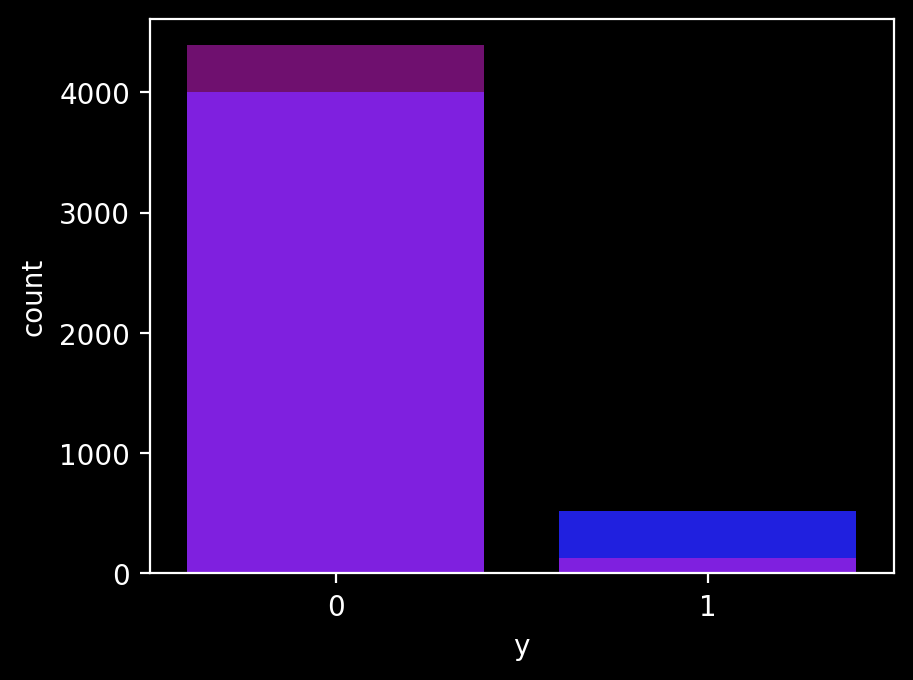

In [9]:
from MachineLearning.SupervisedLearning import NeuralNetwork
y = bank['y'].values
select = ['job_retired', 'marital_married', 'default_no', 'loan_yes', 'contact_unknown', 'month_dec', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_success', 'poutcome_unknown']
X = bank[(col for col in select if col != 'y')].values

NN = NeuralNetwork(X,y,lam=1,hidden_layers=[25,25,25])
theta,J = NN(method="CG",options={'maxiter':100})
plt.plot(J)
plt.show()
p = NN .predict(X,theta)
print(np.unique(p))
bank_predict = bank.copy(deep=True)
bank_predict['y'] = p
fig,ax = plt.subplots()
sns.countplot(x='y',data=bank,ax=ax,color="blue")
sns.countplot(x='y',data=bank_predict,ax=ax,color="magenta",alpha=0.5)
plt.show()